In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

QUESTION 2

Sammy Suliman, last modified: 12/3/2022 $\newline$
The purpose of the code is to compute the real-valued Fourier coefficients $a_k$ and $b_k$ from the complex-valued Fourier
coefficients $c_k$ computed my the package numpy.fft.fft. The code does this by first evaluating the Fast Fourier Transform
of the function $f(x) = e^{sin(x)}$ at the specified nodes $x_0 = 0, x_1 = \frac{2\pi}{5}, x_2 = \frac{4\pi}{5}, x_3 = \frac{6\pi}{5}, x_4 = \frac{8\pi}{5}$. We then use the formula $c_k = \frac{a_k - i \cdot b_k}{2}$ to derive the corresponding real coefficients.

In [2]:
def x_creator(N):
    x_list = []
    for j in range(N):
        x_list.append((2*j*math.pi)/N)
    return x_list

In [3]:
x_list = x_creator(5)

In [4]:
x_list

[0.0,
 1.2566370614359172,
 2.5132741228718345,
 3.7699111843077517,
 5.026548245743669]

In [5]:
def f(x_list):
    f_list = []
    for x in x_list:
        f_list.append(math.exp(np.sin(x)))
    return f_list

In [6]:
f_list = f(x_list)

In [7]:
print(f_list)

[1.0, 2.5884429473328665, 1.7999974573044335, 0.5555563403392465, 0.3863326410305472]


In [8]:
fft_list = np.fft.fft(f_list)

In [9]:
for c_k in fft_list:
    print(c_k)

(6.330329386007094+0j)
(0.013573157797844848-2.825795492308047j)
(-0.6787378508013916-0.11083412853040353j)
(-0.6787378508013916+0.11083412853040353j)
(0.013573157797844848+2.825795492308047j)


In [10]:
a_k_list = []
b_k_list = []
for c_k in fft_list:
    c_k2 = 2*c_k
    b_k_list.append(-1 * np.imag(c_k2))
    a_k_list.append(np.real(c_k2))
    
print(a_k_list)
print(b_k_list)

[12.660658772014187, 0.027146315595689696, -1.3574757016027832, -1.3574757016027832, 0.027146315595689696]
[-0.0, 5.651590984616094, 0.22166825706080706, -0.22166825706080706, -5.651590984616094]


QUESTION 3

Sammy Suliman, last modified: 12/3/2022 $\newline$
The purpose of the code is to find the approximation to the derivative of $f(x) = e^{sin(x)}$, $f'(x) = e^{sin(x)} \cdot cos(x)$, using the derivative of the spectral approximation $P_8(x)$, $P'_8(x)$ at the interpolating points $x_0 = 0, x_1 = \frac{\pi}{4}, x_2 = \frac{\pi}{2}, x_3 = \frac{3\pi}{4}, x_4 = \pi, x_5 = \frac{5\pi}{4}, x_6 = \frac{3\pi}{2}, x_7 = \frac{7\pi}{4}$. To do this, we first create a function p that computes the polynomial $P_8(x) = \sum_{k=-4}^{4} c_ke^{ikx}$ (with an additional factor of $\frac{1}{2}$ on the first and last terms). We then define a separate derivative function p_prime, which calculates $P_8'(x) = \sum_{k=-4}^{4} (ik) \cdot c_ke^{ikx}$. We then compute the actual error, $f'(x) - P_8'(x)$ at 1000 points over the interval $[-5,5]$ and plot.

In [11]:
x_list2 = x_creator(8)

In [12]:
x_list2

[0.0,
 0.7853981633974483,
 1.5707963267948966,
 2.356194490192345,
 3.141592653589793,
 3.9269908169872414,
 4.71238898038469,
 5.497787143782138]

In [13]:
def f_prime(x_list):
    f_prime_list = []
    for x in x_list:
        f_prime_list.append(math.exp(np.sin(x)) * np.cos(x))
    return f_prime_list

In [14]:
f_prime_list = f(x_list2)

In [15]:
c_k_list1 = np.fft.fft(f_prime_list)

In [16]:
c_k_list1

array([ 1.01285286e+01+0.j        , -2.22044605e-16-4.52128567j,
       -1.08616127e+00+0.j        , -2.22044605e-16+0.1795191j ,
        4.37939235e-02+0.j        , -2.22044605e-16-0.1795191j ,
       -1.08616127e+00+0.j        , -2.22044605e-16+4.52128567j])

In [17]:
def p(x, c_k_list1):
    c_k_list2 = []
    poly = 0
    for c_k in c_k_list1[1:]:
        c_k_list2.append(np.conj(c_k))
    c_k_list = list(reversed(list(c_k_list2))) + list(c_k_list1)
    print(c_k_list)
    for k, c_k in enumerate(c_k_list):
        if (k == 0) or (k == len(c_k_list)-1):
            poly += 0.5 *c_k*np.exp(x * (k-((len(c_k_list)-1)/2)) * 1j)
        else:
            poly += c_k*np.exp(x * (k-((len(c_k_list)-1)/2)) * 1j)
    return poly

In [31]:
def p_prime(x, c_k_list1):
    c_k_list2 = []
    poly = 0
    for c_k in c_k_list1[1:]:
        c_k_list2.append(np.conj(c_k))
    c_k_list = list(reversed(list(c_k_list2))) + list(c_k_list1)
    for k, c_k in enumerate(c_k_list):
        if (k == 0) or (k == len(c_k_list)-1):
            poly += 0.5 * 1j * (k-((len(c_k_list)-1)/2)) * c_k * np.exp(x * (k-((len(c_k_list)-1)/2)) * 1j)
        else:
            poly += 1j * (k-((len(c_k_list)-1)/2)) * c_k * np.exp(x * (k-((len(c_k_list)-1)/2)) * 1j)
    return poly

In [32]:
p(0, c_k_list1)

[(-2.220446049250313e-16-4.521285669832817j), (-1.0861612696304874-0j), (-2.220446049250313e-16+0.17951910474238852j), (0.04379392354506262-0j), (-2.220446049250313e-16-0.17951910474238852j), (-1.0861612696304874-0j), (-2.220446049250313e-16+4.521285669832817j), (10.128528615715911+0j), (-2.220446049250313e-16-4.521285669832817j), (-1.0861612696304874+0j), (-2.220446049250313e-16+0.17951910474238852j), (0.04379392354506262+0j), (-2.220446049250313e-16-0.17951910474238852j), (-1.0861612696304874+0j), (-2.220446049250313e-16+4.521285669832817j)]


(5.871471384284086+0j)

In [33]:
p_prime(0, c_k_list1)

(-21.888351930194535+9.992007221626409e-16j)

In [34]:
p_prime_list = []
for x in list(np.arange(-5, 5, 0.002)):
    p_prime_list.append(p_prime(x, c_k_list1))

In [35]:
f_prime_list = f_prime(list(np.arange(-5, 5, 0.002)))

In [36]:
error_rate = []
for i, f_val in enumerate(f_prime_list):
    error_rate.append(f_val - p_prime_list[i])

C:\Users\filto\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


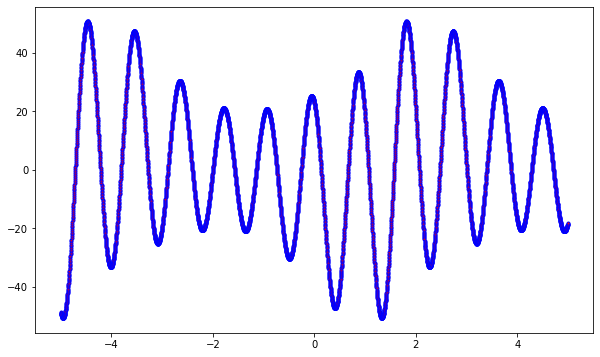

In [37]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(-5, 5, 0.002), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=3)